In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as anim
from tqdm import tqdm 

# Tarea1 

En este cuaderno se desarrolla la tarea 1. 

## Punto 1 

 Se describen dos métodos 

A.  Se utiliza el método `CheckWallLimits` de la clase
    con la modificación de la restitución. Usando 
    este método la pelota para.  
B.  Se modifica el método `CheckWallLimits` de la clase. 
    Ahora, la pelota solo invierte su dirección de
    velocidad en y, al impactar la pared, si esta tiene 
    una velocidad hacia abajo. En este caso, 
    la pelota no pare estrictamente pero se puede
    ver cuanto es la altura final respecto a la inicial.


In [2]:

class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetAcceleration(i, self.a)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2, restitution = 1, method = 1):

        if(method == 1): # CheckWallLimits de la clase
            for i in range(dim):

                if (self.r[i] + self.radius  > limits[i]): 
                    self.v[i] = - restitution*self.v[i]

                if (self.r[i] - self.radius < - limits[i]):
                    self.v[i] = - restitution*self.v[i]
         
        else: # CheckWallLimits alternativo
            for i in range(dim):

                if (self.r[i] + self.radius  > limits[i] and self.v[i] > 0): 
                    self.v[i] = - restitution*self.v[i]

                if (self.r[i] - self.radius < - limits[i] and self.v[i] < 0):
                    self.v[i] = - restitution*self.v[i]
            
    
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v

    def SetAcceleration(self,i,a):
        self.aVector[i] = a
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 

    def GetVelocityVector(self):
        return self.vVector

    def GetRVelocityVector(self):
        return self.RvVector 
    
    def GetKineticEnergy(self):
        return (1/2)*self.m*np.sum(self.vVector ** 2, axis = 1 )

    def GetPotentialEnergy(self):
        return self.m*9.8*self.rVector[:, 1]

    def GetMechanicalEnergy(self):
        return self.GetPotentialEnergy() + self.GetKineticEnergy()

    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
                
               # print(self.RrVector)

def GetParticles(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

def RunSimulation(t,NParticles = 100, Velo = 6, Dim = 2):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo, dt=dt, Dim = Dim)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(Limits, dim = Dim)
            Particles[i].Evolution(it)
       
    return Particles

def RunDampedBallSimulation(t, r0, v0, a0, e, Limits, tmax = 30, method = 1):

    p = Particle(r0, v0, a0, t, 1, 1, 0)

    for tStep in tqdm(range(len(t))):
        p.CheckWallLimits(Limits, restitution=e, method = method)
        p.Evolution(tStep)

    return p


def ReduceTime(t,factor, Particles = []):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

Ahora se corren los ejemplos 

100%|██████████| 3001/3001 [00:00<00:00, 55073.27it/s]


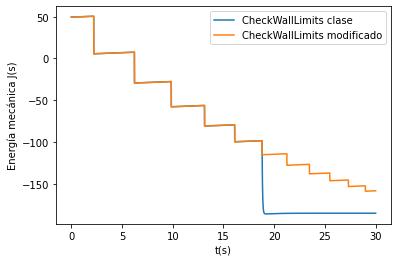

In [3]:
Limits = np.array([20.,20.])

dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

r0 = np.array([-15., 5.])
v0 = np.array([1., 0.])
a0  = np.array([0., -9.8])

dampedParticle = RunDampedBallSimulation(t, r0, v0, a0, 0.9, Limits, 30, method = 1)

r0 = np.array([-15., 5.])
v0 = np.array([1., 0.])
a0  = np.array([0., -9.8])

dampedParticle2 = RunDampedBallSimulation(t, r0, v0, a0, 0.9, Limits, 30, method = 0)

plt.plot(t, dampedParticle.GetMechanicalEnergy(), label = 'CheckWallLimits clase')
plt.plot(t, dampedParticle2.GetMechanicalEnergy(), label = 'CheckWallLimits modificado')
plt.ylabel('Energía mecánica J(s)')
plt.xlabel('t(s)')
plt.legend()
plt.show()

Entonces, para cada caso, el tiempo de parada y el porcentaje de la altura inicial, respectivamente, es

In [4]:
print('Tiempo en dejar de rebotar (CheckWallLimits clase): ',  np.round(np.min(t[np.array(dampedParticle.GetMechanicalEnergy()) < -186]), 3), 's' )
print('A 30s, la altura de la particula con (CheckWallLimits modificado)  es ', np.round((dampedParticle2.rVector[-1, 1]+20)/(dampedParticle2.rVector[0, 1] + 20) * 100), r' % de la incial' )

Tiempo en dejar de rebotar (CheckWallLimits clase):  19.08 s
A 30s, la altura de la particula con (CheckWallLimits modificado)  es  14.0  % de la incial


Seguidamente, se corren las simulaciones. Para el caso de `CheckWallLimits` de la clase 

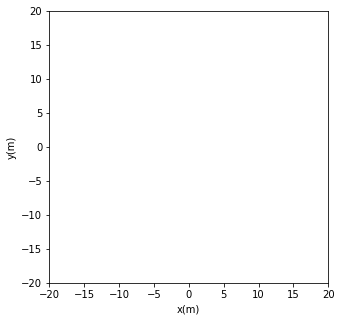

In [5]:
redt = ReduceTime(t, 10, Particles = [dampedParticle])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_xlabel('x(m)')
    ax.set_ylabel('y(m)')

def Update(i, Particles = [], method = 'clase'):
    
    plot = ax.clear()
    init()
    ax.set_title(r'$t=%.2f \ seconds$ CheckWallLimits ' %(redt[i]) + method, fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
     
        
        vx = p.GetRVelocityVector()[i,0]
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        ax.add_patch(circle)
        ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig, lambda i: Update(i, Particles = [dampedParticle]), frames=len(redt),init_func=init, interval = 10, repeat = False)


Luego, se corre el ejemplo con `CheckWallLimits` modificado

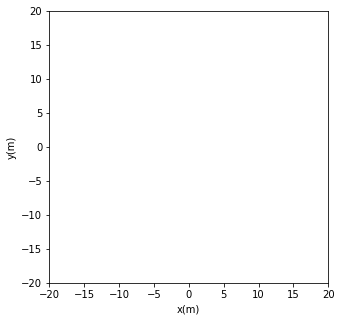

In [6]:
edt = ReduceTime(t, 10, Particles = [dampedParticle2])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_xlabel('x(m)')
    ax.set_ylabel('y(m)')

def Update(i, Particles = [], method = 'modificado'):
    
    plot = ax.clear()
    init()
    ax.set_title(r'$t=%.2f \ seconds$ CheckWallLimits ' %(redt[i]) + method, fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
     
        
        vx = p.GetRVelocityVector()[i,0]
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        ax.add_patch(circle)
        ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig, lambda i: Update(i, Particles = [dampedParticle2]), frames=len(redt),init_func=init, interval = 10, repeat = False)

## Punto 2 

Se empieza con la inicialización de las variables de la simulación de N cuerpos

100%|██████████| 3001/3001 [00:04<00:00, 688.98it/s]


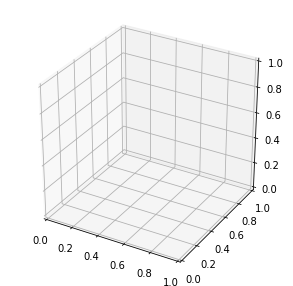

In [7]:
Limits = np.array([10.,10.,10.])

dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

Particles = RunSimulation(t, Velo=10, Dim = 3)

redt = ReduceTime(t, 10, Particles = Particles)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = '3d')


Posteriormente, se corre la animación en 3D

In [8]:
def init3D():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    ax.set_zlabel('z[m]')


def Update3D(i, Particles = Particles):
    plot = ax.clear()
    init()
    ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        ax.scatter(x, y, z, color = 'black', s = 5)

    return plot

Animation = anim.FuncAnimation(fig, lambda i: Update3D(i, Particles = Particles), frames=len(redt),init_func=init3D, interval = 10, repeat = False)